In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data=pd.read_csv('C:/Users/sivam/Desktop/HR/day2/H2HBABBA2627.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930603e+09,2020-03-05,20200304,20200305,20200320.0,USD,RV,1.0,NaN,41652.71,20200305.0,NAH4,1.930603e+09,1
1,U001,0200794332,COST,2019-10-07 00:00:00,2019.0,1.929908e+09,2019-09-23,20190921,20190923,20191008.0,USD,RV,1.0,NaN,699.38,20190923.0,NAAX,1.929908e+09,0
2,U001,0200769623,WAL-MAR co,2019-10-08 00:00:00,2019.0,1.929907e+09,2019-09-21,20190920,20190921,20191006.0,USD,RV,1.0,NaN,21667.93,20190921.0,NAH4,1.929907e+09,0
3,U001,0200759878,SA in,NaN,2020.0,1.930687e+09,2020-03-22,20200323,20200322,20200406.0,USD,RV,1.0,NaN,25237.69,20200322.0,NAH4,1.930687e+09,1
4,U001,0200769623,WAL-MAR,2019-04-08 00:00:00,2019.0,1.929037e+09,2019-03-27,20190327,20190327,20190411.0,USD,RV,1.0,NaN,170.88,20190327.0,NAH4,1.929037e+09,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [3]:
#checking uniques
data.nunique()


business_code                 6
cust_number                1416
name_customer              4141
clear_date                  395
buisness_year                 2
doc_id                    48840
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 548
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44321
baseline_create_date        506
cust_payment_terms           76
invoice_id                48836
isOpen                        2
dtype: int64

In [4]:
#correlation between features
data.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.009400,0.976405,0.982194,0.990310,NaN,NaN,0.004781,0.982471,-0.007924,0.750797
doc_id,-0.009400,1.000000,-0.006152,-0.007883,-0.011585,NaN,NaN,0.172847,-0.005966,1.000000,-0.010205
document_create_date,0.976405,-0.006152,1.000000,0.992752,0.973851,NaN,NaN,0.008655,0.991926,-0.004445,0.759870
document_create_date.1,0.982194,-0.007883,0.992752,1.000000,0.979046,NaN,NaN,0.006894,0.999167,-0.006201,0.760996
due_in_date,0.990310,-0.011585,0.973851,0.979046,1.000000,NaN,NaN,0.005871,0.979787,-0.009949,0.752021
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.004781,0.172847,0.008655,0.006894,0.005871,NaN,NaN,1.000000,0.007296,0.181044,0.010524
baseline_create_date,0.982471,-0.005966,0.991926,0.999167,0.979787,NaN,NaN,0.007296,1.000000,-0.004212,0.760823
invoice_id,-0.007924,1.000000,-0.004445,-0.006201,-0.009949,NaN,NaN,0.181044,-0.004212,1.000000,-0.009212


In [5]:
#droping duplicate rows
data=data.drop_duplicates()

#From the above correlation 
#removing features from the value is aprox. 0.9+
#droping posting_id because all feature are same and area_business because all  feature are NaN
#droping invoice _id because invoice_id is same as doc_id then remove invoice id and doc_id feature name changes to invoice_id
#By doing above step we no need to loss 5 NaNs data from invoice_id
data.drop(["posting_id","invoice_id","buisness_year","document type","document_create_date.1","baseline_create_date","area_business","isOpen"],axis=1,inplace=True)

#renaming few feature for our convinent:
data.rename({'buisness_year':'business_year','name_customer':'customer_name','cust_number':'customer_number','doc_id':'invoice_id'},axis=1,inplace=True)
data.head()

,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR associates,NaN,1.930603e+09,2020-03-05,20200304,20200320.0,USD,41652.71,NAH4
1,U001,0200794332,COST,2019-10-07 00:00:00,1.929908e+09,2019-09-23,20190921,20191008.0,USD,699.38,NAAX
2,U001,0200769623,WAL-MAR co,2019-10-08 00:00:00,1.929907e+09,2019-09-21,20190920,20191006.0,USD,21667.93,NAH4
3,U001,0200759878,SA in,NaN,1.930687e+09,2020-03-22,20200323,20200406.0,USD,25237.69,NAH4
4,U001,0200769623,WAL-MAR,2019-04-08 00:00:00,1.929037e+09,2019-03-27,20190327,20190411.0,USD,170.88,NAH4


### datatype casting

In [6]:

data['due_in_date']=data['due_in_date'].astype(int)
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')#data['posting_date'] = pd.to_numeric(data['posting_date'])
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')
data['posting_date'] = pd.to_datetime(data['posting_date'], format='%Y-%m-%d')
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'], format='%Y-%m-%d')

In [7]:
#spliting data into data_train and data_test based on clear_date NaN:
data_train = data[data.clear_date.isnull()==False]
data_test = data[data.clear_date.isnull()]


#sorting data by the help document_create_date feature
data_train.sort_values(by=['document_create_date'])

,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
32646,U013,0140103311,GLOBA llc,2019-01-29,1.991820e+09,2019-01-01,2018-12-28,2019-01-31,USD,43054.25,NAVE
28153,U013,0140103773,ETAK I trust,2019-03-01,1.991820e+09,2019-01-01,2018-12-28,2019-03-02,USD,17760.42,NAUZ
2396,U013,0140103423,COS foundation,2019-01-22,1.991819e+09,2019-01-01,2018-12-28,2019-01-31,USD,2789.45,NAVE
31538,U001,0200769623,WAL-MAR associates,2019-01-10,1.928538e+09,2018-12-31,2018-12-29,2019-01-15,USD,72795.86,NAH4
46337,U001,0200769623,WAL-MAR systems,2019-01-10,1.928539e+09,2018-12-31,2018-12-29,2019-01-15,USD,3981.18,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
38611,U001,0200974851,RESTA foundation,2020-03-12,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,USD,1430.49,NAA8
12351,U001,0200705742,DOT trust,2020-03-12,1.930578e+09,2020-02-26,2020-02-27,2020-03-17,USD,30201.20,NAD1
39376,U001,0200357714,US foundation,2020-03-13,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,USD,13783.54,NAA8
38119,CA02,0140104392,FLANAG systems,2020-03-10,2.960618e+09,2020-02-27,2020-02-27,2020-03-09,CAD,10706.40,CA10


In [8]:
#creating delay from clear_date and due_in_date
data_train['Delay']=data_train['clear_date'].sub(data_train['due_in_date'])

In [9]:
data_train.nunique()

business_code               6
customer_number          1348
customer_name            3834
clear_date                395
invoice_id              39150
posting_date              422
document_create_date      426
due_in_date               492
invoice_currency            2
total_open_amount       35667
cust_payment_terms         72
Delay                     183
dtype: int64

In [10]:
data_train['Delay'] = pd.to_numeric(data_train['Delay'].dt.days, downcast='integer')

## split data


In [11]:
x=data_train.drop('Delay',axis=1)
y=data_train['Delay']


In [12]:
y.head()

1   -1
2    2
4   -3
5   -8
6   -1
Name: Delay, dtype: int16

In [13]:
#splitting the main_train  into two part --> split i.e 30% test ,70% train 
from sklearn.model_selection import train_test_split
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)
#validation set
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [14]:
x_train.tail()

,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
34748,U001,0200418007,AM corp,2019-02-11,1.928660e+09,2019-01-25,2019-01-22,2019-02-09,USD,3946.17,NAA8
34750,U001,0200769623,WAL-MAR associates,2019-08-02,1.929646e+09,2019-07-22,2019-07-22,2019-08-06,USD,54457.07,NAH4
34752,U001,0200736337,SYSCO F corporation,2020-02-18,1.930450e+09,2020-01-30,2020-01-29,2020-02-14,USD,27355.90,NAA8
34753,U001,0200769623,WAL-MAR us,2019-10-09,1.929934e+09,2019-09-28,2019-09-27,2019-10-13,USD,7826.61,NAH4
34755,U001,0200290370,BARGAIN associates,2019-02-01,1.928625e+09,2019-01-16,2019-01-15,2019-01-31,USD,24551.53,NAA8


In [15]:
x_train.shape , x_val.shape , x_test.shape

((27405, 11), (5872, 11), (5873, 11))

# EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

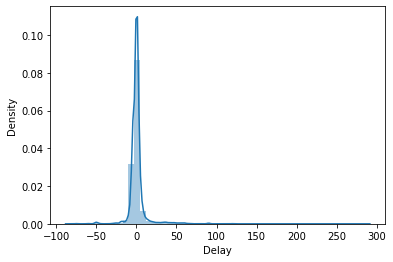

In [16]:
# distribution of the target column 
# skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

<AxesSubplot:xlabel='Delay', ylabel='due_in_date'>

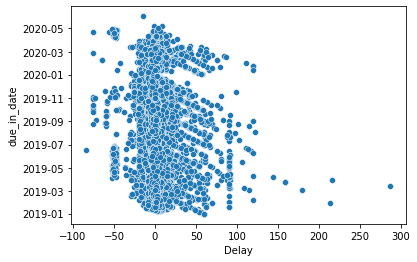

In [17]:
#No direct trend
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="Delay", y="due_in_date")

<AxesSubplot:xlabel='Delay', ylabel='document_create_date'>

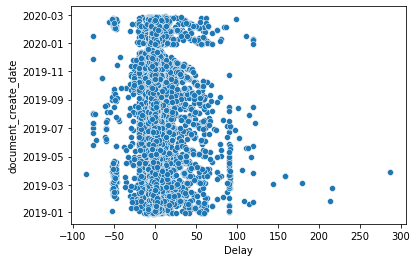

In [18]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="Delay", y="document_create_date")

<AxesSubplot:xlabel='Delay', ylabel='clear_date'>

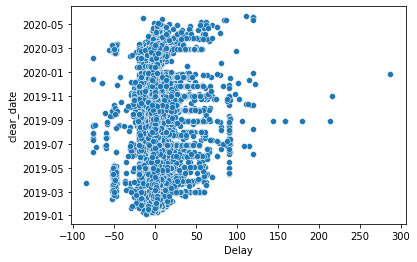

In [19]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="Delay", y="clear_date")

In [20]:
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay
0,1,U001,0200794332,COST,2019-10-07,1.929908e+09,2019-09-23,2019-09-21,2019-10-08,USD,699.38,NAAX,-1
1,2,U001,0200769623,WAL-MAR co,2019-10-08,1.929907e+09,2019-09-21,2019-09-20,2019-10-06,USD,21667.93,NAH4,2
2,4,U001,0200769623,WAL-MAR,2019-04-08,1.929037e+09,2019-03-27,2019-03-27,2019-04-11,USD,170.88,NAH4,-3
3,5,U001,0200416837,DEC llc,2019-07-16,1.929614e+09,2019-07-12,2019-07-12,2019-07-24,USD,3014.03,NAM4,-8
4,6,U001,0200799342,MITCH us,2019-08-09,1.929657e+09,2019-07-26,2019-07-26,2019-08-10,USD,1359.45,NAA8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27400,34748,U001,0200418007,AM corp,2019-02-11,1.928660e+09,2019-01-25,2019-01-22,2019-02-09,USD,3946.17,NAA8,2
27401,34750,U001,0200769623,WAL-MAR associates,2019-08-02,1.929646e+09,2019-07-22,2019-07-22,2019-08-06,USD,54457.07,NAH4,-4
27402,34752,U001,0200736337,SYSCO F corporation,2020-02-18,1.930450e+09,2020-01-30,2020-01-29,2020-02-14,USD,27355.90,NAA8,4
27403,34753,U001,0200769623,WAL-MAR us,2019-10-09,1.929934e+09,2019-09-28,2019-09-27,2019-10-13,USD,7826.61,NAH4,-4


# feature engg

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27405 entries, 1 to 34755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27405 non-null  object        
 1   customer_number       27405 non-null  object        
 2   customer_name         27405 non-null  object        
 3   clear_date            27405 non-null  datetime64[ns]
 4   invoice_id            27405 non-null  float64       
 5   posting_date          27405 non-null  datetime64[ns]
 6   document_create_date  27405 non-null  datetime64[ns]
 7   due_in_date           27405 non-null  datetime64[ns]
 8   invoice_currency      27405 non-null  object        
 9   total_open_amount     27405 non-null  float64       
 10  cust_payment_terms    27405 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 2.5+ MB


In [22]:
#this function will drop a column from train,val and test.
def to_drop(col):
    x_train.drop(col, axis =1,inplace=True)
    x_val.drop(col,axis=1 , inplace=True)
    x_test.drop(col,axis=1 , inplace=True)
    return x_train,x_val,x_test

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels= ['business_code','customer_number','customer_name','invoice_currency','cust_payment_terms']
def labelencoding(col):
    x_train[col+'_enc']= labelencoder.fit_transform(x_train[col])
    x_test[col+'_enc']= labelencoder.fit_transform(x_test[col])
    x_val[col+'_enc']= labelencoder.fit_transform(x_val[col])
for _ in labels:
    labelencoding(_)
x_train,x_val,x_test=to_drop(['business_code','customer_number','customer_name','invoice_currency','cust_payment_terms'])

In [24]:
dates=['posting_date','document_create_date','due_in_date']
for col in dates:
    x_train['day_of_'+col] = x_train[col].dt.day
    x_train['month_of_'+col] = x_train[col].dt.month
    x_train['year_of_'+col] = x_train[col].dt.year
    x_val['day_of_'+col] = x_val[col].dt.day
    x_val['month_of_'+col] = x_val[col].dt.month
    x_val['year_of_'+col] = x_val[col].dt.year
    x_test['day_of_'+col] = x_test[col].dt.day
    x_test['month_of_'+col] = x_test[col].dt.month
    x_test['year_of_'+col] = x_test[col].dt.year

In [25]:
x_train,x_val,x_test=to_drop(['clear_date','posting_date','document_create_date','due_in_date'])

In [26]:
# wrote a custom function to do a  check  on all the dataframes 
def check():
    print(x_train.info())
    print("****************************")
    print(x_train.shape,x_val.shape,x_test.shape)
    print("************Train Null Count****************")
    print(x_train.isna().sum())
    print("************Test Null Count ****************")
    print(x_test.isna().sum())    
    print("************Val Null Count ****************")
    print(x_val.isna().sum())  

In [27]:
check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27405 entries, 1 to 34755
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   invoice_id                     27405 non-null  float64
 1   total_open_amount              27405 non-null  float64
 2   business_code_enc              27405 non-null  int32  
 3   customer_number_enc            27405 non-null  int32  
 4   customer_name_enc              27405 non-null  int32  
 5   invoice_currency_enc           27405 non-null  int32  
 6   cust_payment_terms_enc         27405 non-null  int32  
 7   day_of_posting_date            27405 non-null  int64  
 8   month_of_posting_date          27405 non-null  int64  
 9   year_of_posting_date           27405 non-null  int64  
 10  day_of_document_create_date    27405 non-null  int64  
 11  month_of_document_create_date  27405 non-null  int64  
 12  year_of_document_create_date   27405 non-null 

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

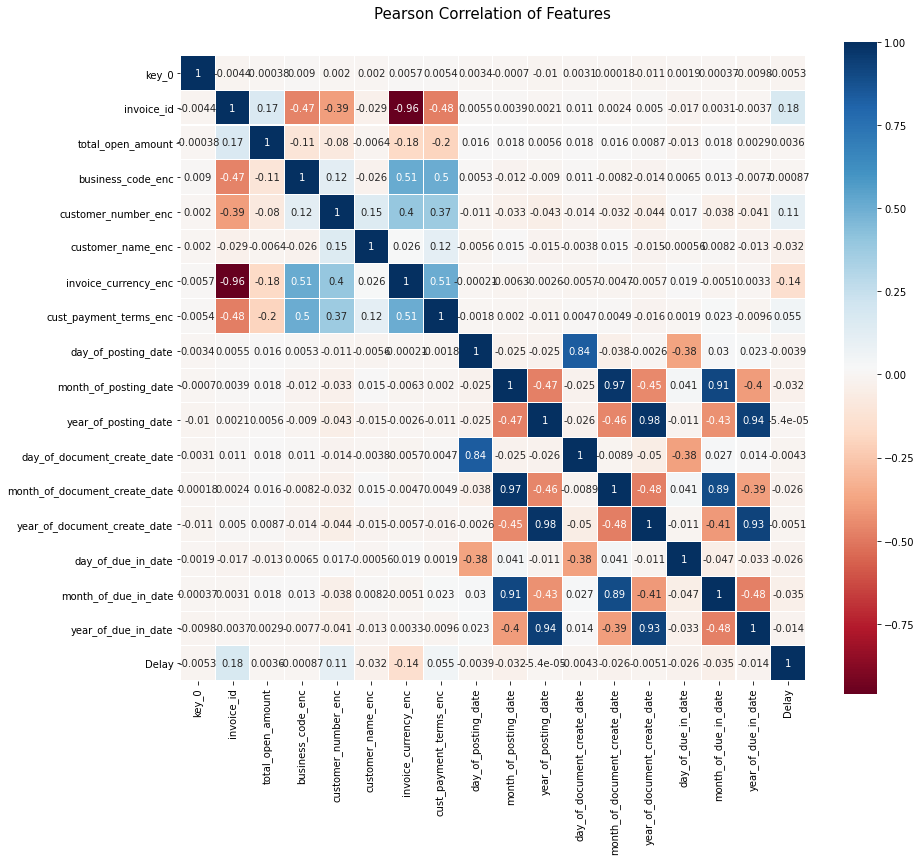

In [28]:
#Feature Selection

#corrmat = x_train.merge(y_train , on = x_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on=x_train.index).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
#From the above Pearson Correlation of Features 
#removing features from the value is aprox. 0.9 or above 
x_train,x_val,x_test=to_drop(['day_of_posting_date','month_of_posting_date','year_of_posting_date','month_of_document_create_date','year_of_document_create_date'])

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

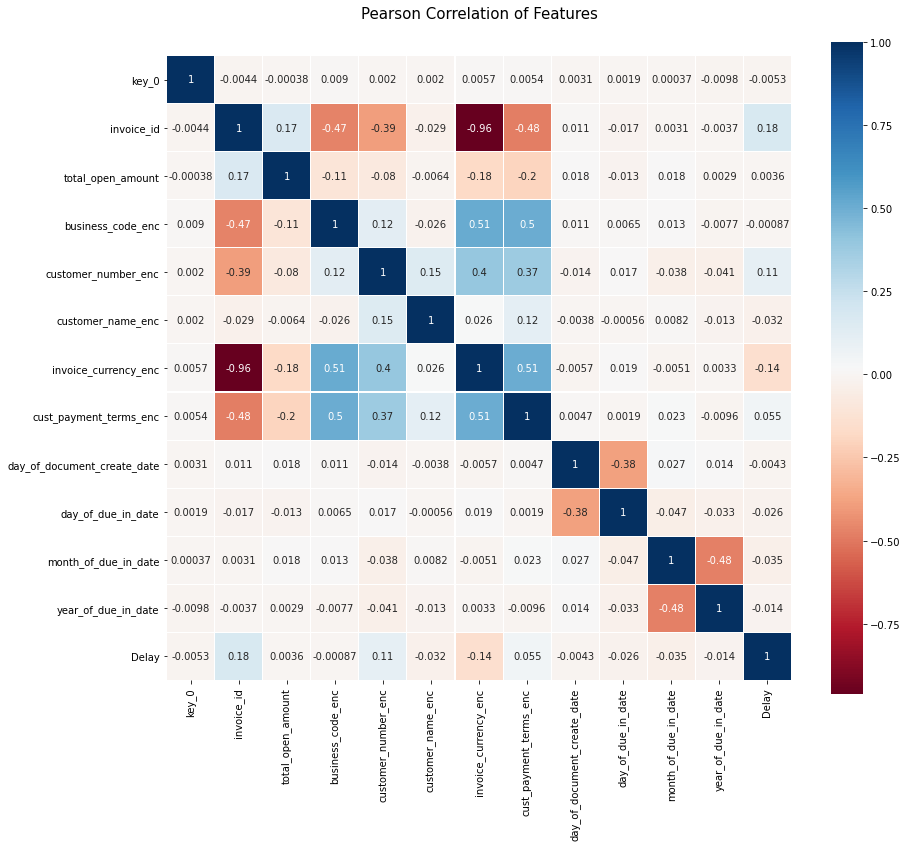

In [30]:
#After removing the correlated values from the above heatmap again recalling heatmap for checking any simiarity
#corrmat = x_train.merge(y_train , on = x_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on=x_train.index).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [31]:
check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27405 entries, 1 to 34755
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   invoice_id                   27405 non-null  float64
 1   total_open_amount            27405 non-null  float64
 2   business_code_enc            27405 non-null  int32  
 3   customer_number_enc          27405 non-null  int32  
 4   customer_name_enc            27405 non-null  int32  
 5   invoice_currency_enc         27405 non-null  int32  
 6   cust_payment_terms_enc       27405 non-null  int32  
 7   day_of_document_create_date  27405 non-null  int64  
 8   day_of_due_in_date           27405 non-null  int64  
 9   month_of_due_in_date         27405 non-null  int64  
 10  year_of_due_in_date          27405 non-null  int64  
dtypes: float64(2), int32(5), int64(4)
memory usage: 2.0 MB
None
****************************
(27405, 11) (5872, 11) (5873, 11)
*********

# Modelling

### LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_predict = base_model.predict(x_val)

In [34]:
# rmse
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

11.524481262816597

In [35]:
#r2
from sklearn.metrics import r2_score
round(r2_score(y_val, y_predict), 2)

-0.03

### DecisionTreeRegressor

In [36]:
#Tree based model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_features=10 , max_depth=5)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=10)

In [37]:
y_predict2 = regressor.predict(x_val)

In [38]:
#rmse
mean_squared_error(y_val, y_predict2, squared=False)

12.067496707287749

In [39]:
#Once you think you have good enough result do a prediction on the x_test set just to confirm that the model is not getting overfitted

y_predict_test = regressor.predict(x_test)
mean_squared_error(y_test, y_predict_test, squared=False)

13.193658471687014

In [40]:
#r2
round(r2_score(y_val, y_predict2), 2)

-0.13

### RandomForestRegressor

In [41]:

from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()
Forest.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
y_predict3 = Forest.predict(x_val)

In [43]:
#rmse
mean_squared_error(y_val, y_predict3, squared=False)

13.319863841987033

In [44]:
##r2
round(r2_score(y_val, y_predict3), 2)

-0.37

# The Lost Data(data_test)

In [45]:

data_test.head()

,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR associates,NaT,1.930603e+09,2020-03-05,2020-03-04,2020-03-20,USD,41652.71,NAH4
3,U001,0200759878,SA in,NaT,1.930687e+09,2020-03-22,2020-03-23,2020-04-06,USD,25237.69,NAH4
8,U001,0200769623,WAL-MAR corporation,NaT,1.930723e+09,2020-03-30,2020-03-30,2020-04-14,USD,10008.60,NAH4
11,U001,0100030964,NATURA associates,NaT,1.930747e+09,2020-04-04,2020-04-04,2020-04-19,USD,3699.75,NAA8
12,U001,0200769623,WAL-MAR corp,NaT,1.930800e+09,2020-04-18,2020-04-17,2020-05-03,USD,28171.92,NAH4


# we have to bring the data_test in same format as that of the x_train

### ->step1: preprocessing 
### ->step2: feature engineering
### ->step3: feature selection
### ->step4: fed to model and predict 
## we no need do EDA  Because EDA is done only on the train set



## preprocessing

In [46]:
#Null / constant / duplicate drop same steps
data_test.isna().sum()

business_code              0
customer_number            0
customer_name              0
clear_date              9690
invoice_id                 0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
cust_payment_terms         0
dtype: int64

In [47]:
data_test.head()

,business_code,customer_number,customer_name,clear_date,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
0,U001,0200769623,WAL-MAR associates,NaT,1.930603e+09,2020-03-05,2020-03-04,2020-03-20,USD,41652.71,NAH4
3,U001,0200759878,SA in,NaT,1.930687e+09,2020-03-22,2020-03-23,2020-04-06,USD,25237.69,NAH4
8,U001,0200769623,WAL-MAR corporation,NaT,1.930723e+09,2020-03-30,2020-03-30,2020-04-14,USD,10008.60,NAH4
11,U001,0100030964,NATURA associates,NaT,1.930747e+09,2020-04-04,2020-04-04,2020-04-19,USD,3699.75,NAA8
12,U001,0200769623,WAL-MAR corp,NaT,1.930800e+09,2020-04-18,2020-04-17,2020-05-03,USD,28171.92,NAH4


In [48]:
z_data_test =data_test.drop(['clear_date'],axis=1)

# Lets drop clear_date from data test itself beacuse clear date feature is NaT
data_test.drop(['clear_date'], inplace =True,axis=1)

In [49]:
#we already checked posting_date is correlated from feature selection on train set.so, lets drop the posting_date
data_test.drop(['posting_date'], inplace =True,axis=1)

## Feature Engineering

In [50]:
#label encoding on object data type features
labelencoder = LabelEncoder()
labels= ['business_code','customer_number','customer_name','invoice_currency','cust_payment_terms']
for col in labels:
    data_test[col+'_enc']= labelencoder.fit_transform(data_test[col])




In [51]:
#We no need to generate month and year of document create date because we already deleted these in train set from feature selection
data_test['day_of_document_create_date'] = data_test['document_create_date'].dt.day



data_test['day_of_due_in_date'] = data_test['due_in_date'].dt.day
data_test['month_of_due_in_date'] = data_test['due_in_date'].dt.month
data_test['year_of_due_in_date'] = data_test['due_in_date'].dt.year

In [52]:
#after generating label encoded column then we can remove these features
data_test.drop(["document_create_date","due_in_date","business_code","customer_number","customer_name","invoice_currency","cust_payment_terms"],axis=1,inplace=True)

In [53]:
data_test.head()

,invoice_id,total_open_amount,business_code_enc,customer_number_enc,customer_name_enc,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date
0,1.930603e+09,41652.71,1,394,1708,1,29,4,20,3,2020
3,1.930687e+09,25237.69,1,377,1321,1,29,23,6,4,2020
8,1.930723e+09,10008.60,1,394,1711,1,29,30,14,4,2020
11,1.930747e+09,3699.75,1,39,1105,1,15,4,19,4,2020
12,1.930800e+09,28171.92,1,394,1710,1,29,17,3,5,2020


In [54]:
data_test.columns

Index(['invoice_id', 'total_open_amount', 'business_code_enc',
       'customer_number_enc', 'customer_name_enc', 'invoice_currency_enc',
       'cust_payment_terms_enc', 'day_of_document_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [55]:
x_train.columns

Index(['invoice_id', 'total_open_amount', 'business_code_enc',
       'customer_number_enc', 'customer_name_enc', 'invoice_currency_enc',
       'cust_payment_terms_enc', 'day_of_document_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

# Final outcome

In [56]:
#Predicting 
output = regressor.predict(data_test)

In [57]:
output = pd.Series(output,name='Delay')

In [58]:
# resetting the index of main test so that we can merge price series with it
z_data_test.reset_index(drop=True,inplace=True)


In [59]:
final_output = z_data_test.merge(output , on= data_test.index )
final_output['Delay']=final_output['Delay'].apply(np.ceil)
final_output['Delay']=final_output['Delay'].astype(int)

In [60]:
#checking delay range
final_output['Delay'].unique()

array([  1,   2,  -2,  28, -26,  10,  -9, -43])

In [61]:
#creating new feature called clear by adding delay to the due_in_date
final_output['clear_date']=final_output['due_in_date']+final_output['Delay'].apply(lambda x: pd.Timedelta(x, unit='D'))



In [62]:
#Delay <=0 : bucket 1
#Delay 0 to 10: bucket 2
#Delay >10: bucket 3

In [63]:
bins= [-50,0,10,30] # range of the delay
labels = ['bucket_1','bucket_2','bucket_3'] 
final_output['Bucket'] = pd.cut(final_output['Delay'], bins=bins, labels=labels, right=False)


In [64]:
final_output.head()

,key_0,business_code,customer_number,customer_name,invoice_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,clear_date,Bucket
0,0,U001,0200769623,WAL-MAR associates,1.930603e+09,2020-03-05,2020-03-04,2020-03-20,USD,41652.71,NAH4,1,2020-03-21,bucket_2
1,3,U001,0200759878,SA in,1.930687e+09,2020-03-22,2020-03-23,2020-04-06,USD,25237.69,NAH4,1,2020-04-07,bucket_2
2,8,U001,0200769623,WAL-MAR corporation,1.930723e+09,2020-03-30,2020-03-30,2020-04-14,USD,10008.60,NAH4,1,2020-04-15,bucket_2
3,11,U001,0100030964,NATURA associates,1.930747e+09,2020-04-04,2020-04-04,2020-04-19,USD,3699.75,NAA8,1,2020-04-20,bucket_2
4,12,U001,0200769623,WAL-MAR corp,1.930800e+09,2020-04-18,2020-04-17,2020-05-03,USD,28171.92,NAH4,1,2020-05-04,bucket_2


In [65]:
final_output.to_csv('H2HBABBA2627.csv')